In [1]:
# official webpage :- https://machinelearningmastery.com/define-encoder-decoder-sequence-sequence-model-neural-machine-translation-keras/

In [2]:
!wget http://www.manythings.org/anki/fra-eng.zip

--2021-11-01 13:35:35--  http://www.manythings.org/anki/fra-eng.zip
Resolving www.manythings.org (www.manythings.org)... 104.21.92.44, 172.67.186.54, 2606:4700:3033::ac43:ba36, ...
Connecting to www.manythings.org (www.manythings.org)|104.21.92.44|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6451478 (6.2M) [application/zip]
Saving to: ‘fra-eng.zip’

fra-eng.zip         100%[===================>]   6.15M  --.-KB/s    in 0.08s   

2021-11-01 13:35:36 (75.0 MB/s) - ‘fra-eng.zip’ saved [6451478/6451478]



In [3]:
!unzip fra-eng.zip

Archive:  fra-eng.zip
  inflating: _about.txt              
  inflating: fra.txt                 


In [4]:
text_path = '/content/fra.txt'

In [5]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)
with tf.device(device_name):
  pass

/device:GPU:0


In [6]:
text = open(text_path, 'r').read()
engilsh_text,french_text = [],[]
k=0
for i in text.split('\n'):
  i = i.split('CC-BY')[0]
  i = i.split('\t')
  if len(i)<2:
    print(k,i)
  if len(i)>2:
    engilsh_text.append(i[0])
    french_text.append(i[1])
    #print(i[0],'\t\t',i[1])
  k+=1
print(k)

190206 ['']
190207


In [7]:
print(len(engilsh_text),len(french_text))
print(engilsh_text[178008])
print(french_text[178008])

190206 190206
I'd be depressed if they asked me to quit the team.
Je serais déprimé s'ils me demandaient de quitter l'équipe.


In [8]:
def split(a,b):
  for i,j in zip(a,b):

    p1,p2=[],[]
    for k1 in i:
      if k1 == '':
        p1.append(k1)
      elif len(k1)>0:
        for kk1 in k1:
          p1.append(kk1)
  
    for k2 in j:
      if k2 == '':
        p2.append(k2)
      elif len(k2)>0:
        for kk2 in k2:
          p2.append(kk2)
    yield p1,p2

k=0
for i,j in zip(engilsh_text,french_text):
  print(i,j)
  k+=1
  if k==10:
    break

  
k1=0
for i,j in split(engilsh_text,french_text):
  print(i,j)
  k1+=1
  if k1==10:
    break

Go. Va !
Go. Marche.
Go. Bouge !
Hi. Salut !
Hi. Salut.
Run! Cours !
Run! Courez !
Run! Prenez vos jambes à vos cous !
Run! File !
Run! Filez !
['G', 'o', '.'] ['V', 'a', ' ', '!']
['G', 'o', '.'] ['M', 'a', 'r', 'c', 'h', 'e', '.']
['G', 'o', '.'] ['B', 'o', 'u', 'g', 'e', ' ', '!']
['H', 'i', '.'] ['S', 'a', 'l', 'u', 't', ' ', '!']
['H', 'i', '.'] ['S', 'a', 'l', 'u', 't', '.']
['R', 'u', 'n', '!'] ['C', 'o', 'u', 'r', 's', '\u202f', '!']
['R', 'u', 'n', '!'] ['C', 'o', 'u', 'r', 'e', 'z', '\u202f', '!']
['R', 'u', 'n', '!'] ['P', 'r', 'e', 'n', 'e', 'z', ' ', 'v', 'o', 's', ' ', 'j', 'a', 'm', 'b', 'e', 's', ' ', 'à', ' ', 'v', 'o', 's', ' ', 'c', 'o', 'u', 's', ' ', '!']
['R', 'u', 'n', '!'] ['F', 'i', 'l', 'e', ' ', '!']
['R', 'u', 'n', '!'] ['F', 'i', 'l', 'e', 'z', ' ', '!']


In [9]:
# taking number of data
eng_int = int(input('enter data limit (10 to 178008) :- '))
french_text_split,english_text_split = [],[]
for a,b in split(engilsh_text[:eng_int],french_text[:eng_int]):
  english_text_split.append(a)
  french_text_split.append(b)

enter data limit (10 to 178008) :- 100


In [10]:
english_text_split_revised=[]
for i in english_text_split:
  p='aaa'
  q='bbb'
  l=[]
  l.append(p)
  for k in i:
    l.append(k)
  l.append(q)
  english_text_split_revised.append(l)

  
kkk=0
for i in english_text_split_revised:
  kkk+=1
  print(i)
  if kkk==5:
    break

['aaa', 'G', 'o', '.', 'bbb']
['aaa', 'G', 'o', '.', 'bbb']
['aaa', 'G', 'o', '.', 'bbb']
['aaa', 'H', 'i', '.', 'bbb']
['aaa', 'H', 'i', '.', 'bbb']


In [11]:
aka=0
for i,j in zip(french_text_split, english_text_split_revised):
  print(i,'\t-->\t',j)
  aka=aka+1
  if(aka==5):
    break

['V', 'a', ' ', '!'] 	-->	 ['aaa', 'G', 'o', '.', 'bbb']
['M', 'a', 'r', 'c', 'h', 'e', '.'] 	-->	 ['aaa', 'G', 'o', '.', 'bbb']
['B', 'o', 'u', 'g', 'e', ' ', '!'] 	-->	 ['aaa', 'G', 'o', '.', 'bbb']
['S', 'a', 'l', 'u', 't', ' ', '!'] 	-->	 ['aaa', 'H', 'i', '.', 'bbb']
['S', 'a', 'l', 'u', 't', '.'] 	-->	 ['aaa', 'H', 'i', '.', 'bbb']


In [12]:
import numpy as np
print(np.array(french_text_split).shape)
print(np.array(english_text_split_revised).shape)

(100,)
(100,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
'''
import tensorflow as tf
device_name = tf.test.gpu_device_name()
with tf.device(device_name):
  print(device_name)
'''

'\nimport tensorflow as tf\ndevice_name = tf.test.gpu_device_name()\nwith tf.device(device_name):\n  print(device_name)\n'

In [14]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [15]:
with tf.device(device_name):

  tokenizer_french = Tokenizer()
  tokenizer_french.fit_on_texts(french_text_split)
  french_token = tokenizer_french.texts_to_sequences(french_text_split)
  maxlen_french = max([max(i) for i in french_token])
  pad_sequence_french = pad_sequences(french_token, maxlen=maxlen_french+1)


  tokenizer_english = Tokenizer()
  tokenizer_english.fit_on_texts(english_text_split_revised)
  english_token = tokenizer_english.texts_to_sequences(english_text_split_revised)
  maxlen_english = max([max(i) for i in english_token])
  
  x_1_train, x_2_train = [],[]
  y_train = []
  for j in range(len(english_token)):
    seq = english_token[j]
    ph  = pad_sequence_french[j]
    for i in range(1,len(seq)):
      in_seq , out_seq = seq[:i], seq[i]
      in_seq = pad_sequences([in_seq], maxlen=maxlen_english+1)[0]
      out_seq = to_categorical([out_seq], num_classes=maxlen_english+1)[0]
      x_1_train.append(ph)
      x_2_train.append(in_seq)
      y_train.append(out_seq)

In [16]:
## Visualise the things happeing to reschdule the data set.

print("Maximum length of English string: ",maxlen_english)
print("Maximum length of French string: ",maxlen_french,'\n')
print("*"*100,'\n')

print("Maximum Lenghth of In Sequence i.e. in Pad Sequence is Maxlen_english + 1")
print("Maximum Lenghth of Out Sequence i.e. in Categorial is Maxlen_english + 1",'\n')
print("*"*100,'\n')


for j in range(1):
  seq = english_token[j]
  print("\nEnglish string: ",seq,'\n')
  ph  = pad_sequence_french[j]
  print("\nFrench pad sequence: ",ph,'\n')
  print("-"*100)
  print("*"*100)
  print("-"*100,'\n')
  for i in range(1,len(seq)):
    print(i,'---->---->----->----->----->---->---->\n')
    print("\nFrench pad sequence: ",ph,'\n')
    in_seq , out_seq = seq[:i], seq[i]
    print("\nEnglish In sequence: ",in_seq,'\n')
    print("\nEnglish out sequence: ",out_seq,'\n')
    in_seq = pad_sequences([in_seq], maxlen=maxlen_english+1)[0]
    out_seq = to_categorical([out_seq], num_classes=maxlen_english+1)[0]
    print("\nEnglish In Sequence(pad sequence): ",in_seq,'\n')
    print("\nEnglish Out Sequence(categorical): ",out_seq,'\n')
    print("*"*100)

Maximum length of English string:  29
Maximum length of French string:  40 

**************************************************************************************************** 

Maximum Lenghth of In Sequence i.e. in Pad Sequence is Maxlen_english + 1
Maximum Lenghth of Out Sequence i.e. in Categorial is Maxlen_english + 1 

**************************************************************************************************** 


English string:  [1, 14, 7, 3, 2] 


French pad sequence:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 20  3  2  5] 

----------------------------------------------------------------------------------------------------
****************************************************************************************************
---------------------------------------------------------------------------------------------------- 

1 ---->---->----->----->----->---->---->


French pad sequence:  [ 0  0  0 

In [17]:
import numpy as np
x_1_train = np.array(x_1_train)
x_2_train = np.array(x_2_train)
y_train = np.array(y_train)

print("x_1_train.shape: ",np.array(x_1_train).shape)
print("x_2_train.shape: ",np.array(x_2_train).shape)
print("y_train.shape:   ",np.array(y_train).shape)

print("\nmaxlen_french: ",maxlen_french)
print("maxlen_english: ",maxlen_english)

x_1_train.shape:  (658, 41)
x_2_train.shape:  (658, 30)
y_train.shape:    (658, 30)

maxlen_french:  40
maxlen_english:  29


In [18]:
import warnings
warnings.filterwarnings('ignore')

from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add

In [19]:
def seq2seq_model():

  inputs1 = Input(shape=(len(x_1_train[0]),))
  fe1 = Embedding(maxlen_french+1, 256, mask_zero=True)(inputs1)
  fe2 = Dropout(0.5)(fe1)
  fe3 = LSTM(256)(fe2)
  #fe4 = Dense(256, activation='relu')(fe3)

  inputs2 = Input(shape=(len(x_2_train[0]),))
  se1 = Embedding(maxlen_english+1, 256, mask_zero=True)(inputs2)
  se2 = Dropout(0.5)(se1)
  se3 = LSTM(256)(se2)

  decoder1 = add([fe3, se3])
  decoder2 = Dense(256, activation='relu')(decoder1)
  outputs = Dense(maxlen_english+1, activation='softmax')(decoder2)

  model = Model([inputs1, inputs2], outputs)
  model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [20]:
model = seq2seq_model()
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 41)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 41, 256)      10496       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 30, 256)      7680        input_2[0][0]                    
______________________________________________________________________________________________

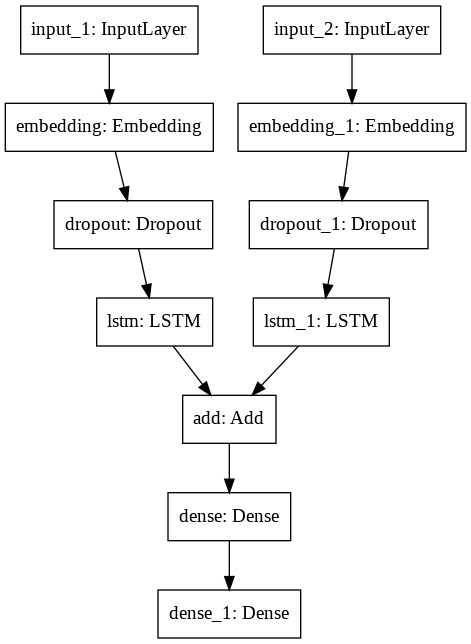

In [21]:
tf.keras.utils.plot_model(model)

In [22]:
def CustomDataGenerator(data1, data2, level, batch_size = 64):
  while True:
    data_size = len(data1)
    number = np.random.choice(np.array([i for i in range(data_size)]) ,size=batch_size)
    data_1_temp,data_2_temp = [],[]
    level_temp = []
    for i in number:
      data_1_temp.append(data1[i])
      data_2_temp.append(data2[i])
      level_temp.append(level[i])
    yield [np.array(data_1_temp), np.array(data_2_temp)], np.array(level_temp)

In [23]:
batch = 1
generator = CustomDataGenerator(x_1_train, x_2_train, y_train, batch_size = batch)

In [24]:
with tf.device(device_name):
  model.fit_generator(generator, epochs = 2, steps_per_epoch = len(x_1_train)//batch, validation_data = generator, validation_steps = len(x_1_train)//batch)

Epoch 1/2
658/658 [==============================] - 221s 319ms/step - loss: 2.5885 - accuracy: 0.2629 - val_loss: 1.8773 - val_accuracy: 0.5030
Epoch 2/2
658/658 [==============================] - 210s 319ms/step - loss: 1.6569 - accuracy: 0.5213 - val_loss: 1.2161 - val_accuracy: 0.6565


In [25]:
"""model_path = '/content/drive/My Drive/DATA_SET/Machine Translation' a
model.save(model_path+'/machine_translation_seq2seq_3_complete_TPU_8_device.h5')"""

"model_path = '/content/drive/My Drive/DATA_SET/Machine Translation' a\nmodel.save(model_path+'/machine_translation_seq2seq_3_complete_TPU_8_device.h5')"

In [26]:
import random
mm=random.randint(0,10)

In [27]:
import time
with tf.device(device_name):

  a11 = time.time()
  from keras.models import load_model
  #model_1 = load_model(model_path+'/machine_translation_seq2seq_3_complete_TPU_8_device.h5')
  model_1 = model

  import random
  from numpy import argmax
  mm=random.randint(1000,2000)
  sentence = french_text[mm]
  print("French to english translate\n")
  print("french: ",sentence,'\n')
  print('actual(english) :- ',engilsh_text[mm],'\n\n')

  ppp=[]
  for i in sentence:
    if i == '':
      ppp.append(i)
      print(i)
    elif len(i)>0:
      for j in i:
        ppp.append(j)

  fra_token_1 = tokenizer_french.texts_to_sequences([ppp])
  pad_fra_1 = pad_sequences(fra_token_1, maxlen=maxlen_french+1)
  
  print(pad_fra_1[0])
  in_text = ['aaa']
  in_text_1 = '' 
  for i in range(len(pad_fra_1[0])):
    sequence = tokenizer_english.texts_to_sequences([in_text])[0]
    # print(np.array(sequence).shape)
    # print(len(x_2_train))
    sequence = pad_sequences([sequence], maxlen=len(x_2_train[0]))
    # print(np.array(sequence).shape)
    yhat = model_1.predict([pad_fra_1,sequence], verbose=0)
    yhat = argmax(yhat)
    word = ''
    for word_1, index in tokenizer_english.word_index.items():
      if index == yhat:
        word = word_1
    if word == 'bbb':
      break
    in_text.append(str(word))
    in_text_1 += word
  print('predicted(english) :- ',in_text_1)
  a12 = time.time()
  print('\ntime taken: ',a12-a11)

French to english translate

french:  Vous conduisez. 

actual(english) :-  You drive. 


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 20  6  9  7  2 12  6  8 18  9 10  7  1 15 13]
predicted(english) :-  go o it.

time taken:  3.3879899978637695


In [28]:
with tf.device(device_name):

  a22 = time.time()
  from keras.models import load_model
  #model_1 = load_model(model_path+'/machine_translation_seq2seq_3_complete_TPU_8_device.h5')
  model_1 = model

  import random
  from numpy import argmax
  #mm=random.randint(1000,2000)
  sentence = french_text[mm]
  print('actual :- ',engilsh_text[mm],'\n\n')

  ppp=[]
  for i in sentence:
    if i == '':
      ppp.append(i)
      print(i)
    elif len(i)>0:
      for j in i:
        ppp.append(j)

  fra_token_1 = tokenizer_french.texts_to_sequences([ppp])
  pad_fra_1 = pad_sequences(fra_token_1, maxlen=maxlen_french+1)
  
  print(pad_fra_1[0])
  pk = pad_fra_1[0]
  pb = np.array([i for i in pk if i != 0])
  print('\n\n',pb,'\n\n')
  in_text = ['aaa']
  in_text_1 = '' 
  for i in range(len(pb)):
    sequence = tokenizer_english.texts_to_sequences([in_text])[0]
    sequence = pad_sequences([sequence], maxlen=len(x_2_train[0]))
    yhat = model_1.predict([pad_fra_1,sequence], verbose=0)
    yhat = argmax(yhat)
    word = ''
    for word_1, index in tokenizer_english.word_index.items():
      if index == yhat:
        word = word_1
    if word == 'bbb':
      break
    in_text.append(str(word))
    in_text_1 += word
  print('predicted :- ',in_text_1)
  a23 = time.time()
  print('time taken: ',a23-a22)


actual :-  You drive. 


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 20  6  9  7  2 12  6  8 18  9 10  7  1 15 13]


 [20  6  9  7  2 12  6  8 18  9 10  7  1 15 13] 


predicted :-  go o it.
time taken:  0.6218945980072021
